## Setup 
To run this locally, you'll need a python environment that includes numpy, matplotlib, and TensorFlow.
I suggest a conda environment or python virtual environment.  Information on installing TF is [here](https://www.tensorflow.org/install)

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import Input, layers

print(tf.__version__)


2.10.0


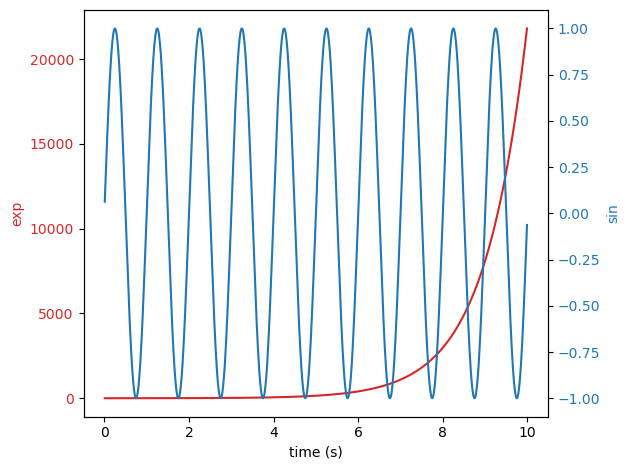

In [2]:
def quick_bar(x):
    return plt.bar(np.arange(len(x)), x)

def grouped_bar(l_values, l_group_names=None): # list of arrays, one for each group
    if l_group_names is None:
        l_group_names = ['']*len(l_values)
    
    frac = 0.8 # each field N has space from N-0.5 to N+0.5 to use. we'll use frac of it
    ind = np.arange(len(l_values[0]))  # the x locations for the groups
    
    width = frac/len(l_values)  # the width of the bars

    fig = plt.gcf()
    ax = plt.gca()
    rects = []
    for i, group_data in enumerate(l_values):
        # the spacing code needs some work.  
        bar_centers = ind-0.5*frac + width/2 + i*width
        rects.append(ax.bar(bar_centers, group_data, width, label=l_group_names[i]))

    ax.set_xticks(ind)
    # ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
    ax.legend()
    

def plotyy(xdata, y1, y2, color1='tab:red', color2='tab:blue', ylabel1='', ylabel2='', xlabel=''):
    ## adapated from https://matplotlib.org/2.2.5/gallery/api/two_scales.html
    fig = plt.gcf()
    ax1 = plt.gca()
    
    ax1.plot(xdata, y1, color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)    
    ax1.set_ylabel(ylabel1, color=color1) 
    ax1.set_xlabel(xlabel)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis        
    ax2.set_ylabel(ylabel2, color=color2)  # we already handled the x-label with ax1
    ax2.plot(xdata, y2, color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    return (ax1, ax2)

t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)
ax1, ax2 = plotyy(t, data1, data2, ylabel1='exp', ylabel2='sin', xlabel='time (s)')


In [3]:
dataset = "mnist"
if dataset == "fashion_mnist":
  fashion_mnist = tf.keras.datasets.fashion_mnist
  (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
elif dataset == "mnist":
  mnist = tf.keras.datasets.mnist
  (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
  class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
elif dataset == "cifar":
  (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
  class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
  train_labels = train_labels.squeeze()
  test_labels = test_labels.squeeze()

input_shape = train_images.shape[1:]pi
train_images = train_images / 255.0
test_images = test_images / 255.0
print("Training Images range from {:2.5f} to {:2.5f}".format(np.min(train_images), np.max(train_images)))
print("Test     Images range from {:2.5f} to {:2.5f}".format(np.min(test_images), np.max(test_images)))

Training Images range from 0.00000 to 1.00000
Test     Images range from 0.00000 to 1.00000


In [4]:

# plt.imshow(train_images[i,:,:])
# print(f"label {i} = {train_labels[i]}")
# plt.colorbar()

In [5]:
print(train_images.shape)
print(len(train_labels))
print(test_images.shape)
print(len(test_labels))
train_labels

(60000, 28, 28)
60000
(10000, 28, 28)
10000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

(28, 28)

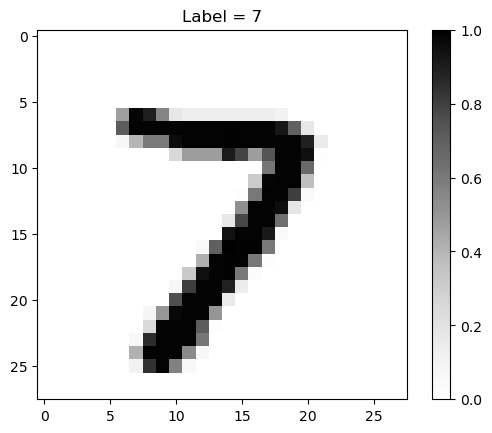

In [6]:
idx = 4000 # 24003 # idx=4321 =>6
plt.figure()
plt.imshow(train_images[idx], cmap='Greys')
plt.colorbar()
plt.grid(False)
plt.title("Label = {:}".format(class_names[train_labels[idx]]))
input_shape

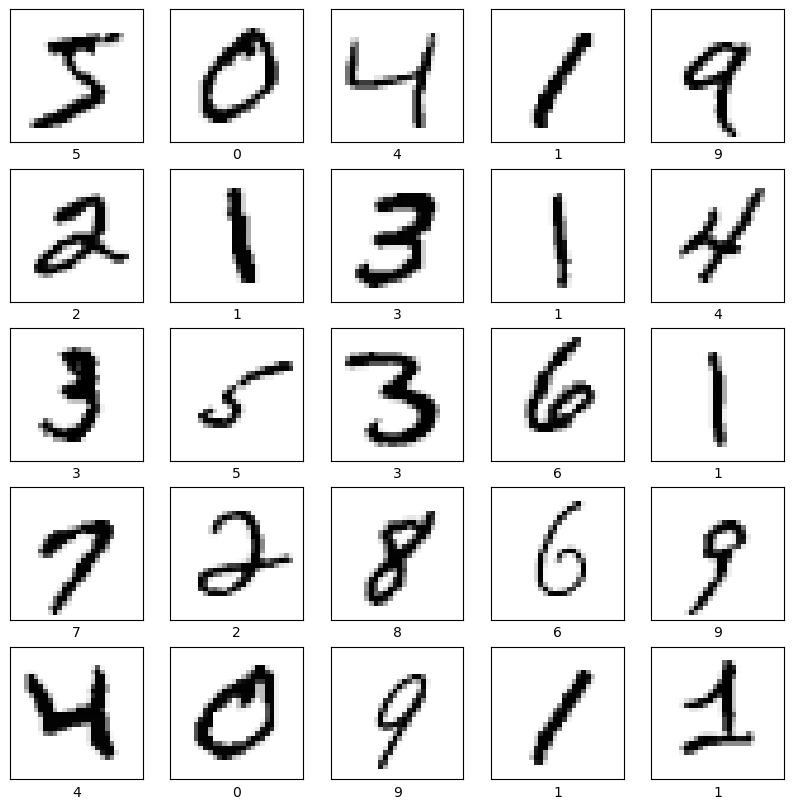

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='Greys')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape), # convert input matrix to vector
    tf.keras.layers.Dense(32, activation='relu'),  # Dense == fully connected
    tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),  # just added
    tf.keras.layers.Dense(10), # 10 units correspond to 10 output classes 0-9
    # tf.keras.layers.Softmax()
])

Metal device set to: Apple M1


2024-01-11 14:15:09.401748: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-11 14:15:09.402097: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
if False:
    # or use the functional API 
    inputs = Input(shape=input_shape)
    x = tf.keras.layers.Flatten(input_shape=input_shape)(inputs)

    x = tf.keras.layers.Dense(32)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Dense(32)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Dense(10)(x)
    x = tf.keras.layers.Softmax()(x)

    model = tf.keras.models.Model(inputs=inputs, outputs=x)

In [10]:
# 5 => 
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]

In [11]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()
# the first dimension 'None' is a place holder for batch size

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [14]:
sm_train_images = train_images[0:50, :, :]
sm_train_labels = train_labels[0:50]


In [19]:
train_hist = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2024-01-11 14:16:59.699852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.3344 - accuracy: 0.9015
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1645 - accuracy: 0.9512
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1271 - accuracy: 0.9620
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1061 - accuracy: 0.9677
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0929 - accuracy: 0.9714
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0821 - accuracy: 0.9746
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0748 - accuracy: 0.9764
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0669 - accuracy: 0.9793
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0618 - accuracy: 0.9803
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0574 - accur

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)#, verbose=0)
# test_loss, test_acc = model.evaluate(train_images,  train_labels)#, verbose=0)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.0954 - accuracy: 0.9725

Test accuracy: 0.9725000262260437

Test loss: 0.09538427740335464


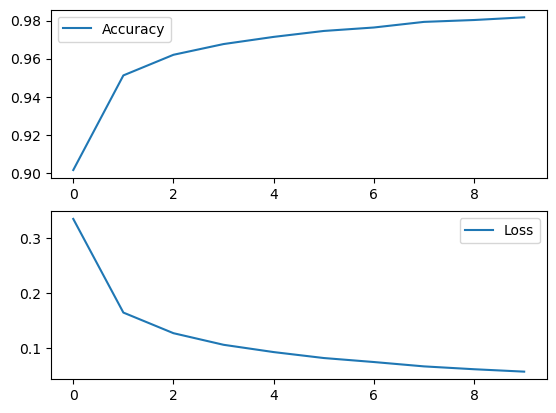

In [21]:
plt.subplot(2,1,1)
plt.plot(train_hist.epoch, train_hist.history['accuracy'])
plt.legend(['Accuracy'])
plt.subplot(2,1,2)
plt.plot(train_hist.epoch, train_hist.history['loss'])
plt.legend(['Loss'])

In [22]:
train_images[5].shape

(28, 28)

1/1 [==============================] - 0s 114ms/step


2024-01-11 14:18:32.613994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


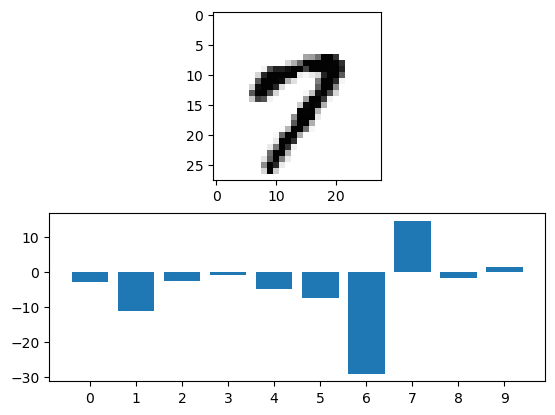

In [23]:
idx = 15
ex_img = train_images[idx:idx+1]  # point out what happens with the indexing here.
ex_out = model.predict(ex_img)    # predict needs shape = (batch,x,y,depth)
plt.subplot(2,1,1)
plt.imshow(ex_img[0,:,:], cmap='Greys')
plt.subplot(2,1,2)
plt.bar(np.arange(10), ex_out[0])
plt.xticks(np.arange(10));

In [24]:
# tmp_img = ex_img[0].reshape((-1))
# for i,x in enumerate(tmp_img):
#     print(f"{np.int(256*x):4}, ", end="")
#     if i % 12 == 0: print("")

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [26]:
l = model.layers[1]
print(l.name)
w, b = l.get_weights()
print(w.shape)
print(b.shape)


dense
(784, 32)
(32,)


In [27]:
l = model.layers[1]
print(l.name)
w, b = l.weights
# print(w)
w_npy = w.numpy()
np.mean(w_npy)

dense


0.0016546864

In [28]:
print(10*'=', "Layer by layer with get_weights()")
for i,l in enumerate(model.layers):
    print(f"Layer {i} is {l.name}.  Has weights <", end='')
    for w in l.get_weights(): # in this context 'weights' includes weights and biases
        print(f"{w.shape}; ", end='')
    print(">") # add newline

# Or we can do it this way to access all the model's weights at once
# but this returns a TF resource type, instead of a numpy array.
print(10*'=', "Whole Model with model.weights")
for w in model.weights:
    print(f"Type is {type(w)} and shape is {w.shape}")

print(10*'=', "Whole Model with get_weights()")
for w in model.get_weights():
    print(f"Type is {type(w)} and shape is {w.shape}")

========== Layer by layer with get_weights()
Layer 0 is flatten.  Has weights <>
Layer 1 is dense.  Has weights <(784, 32); (32,); >
Layer 2 is dense_1.  Has weights <(32, 32); (32,); >
Layer 3 is dense_2.  Has weights <(32, 10); (10,); >
========== Whole Model with model.weights
Type is <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> and shape is (784, 32)
Type is <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> and shape is (32,)
Type is <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> and shape is (32, 32)
Type is <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> and shape is (32,)
Type is <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> and shape is (32, 10)
Type is <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> and shape is (10,)
========== Whole Model with get_weights()
Type is <class 'numpy.ndarray'> and shape is (784, 32)
Type is <class 'numpy.nd

Look at the first layer weights as a matrix.  The matrix has 784 rows, because we flatten each input from a 28x28 element matrix into a 784-element vector.

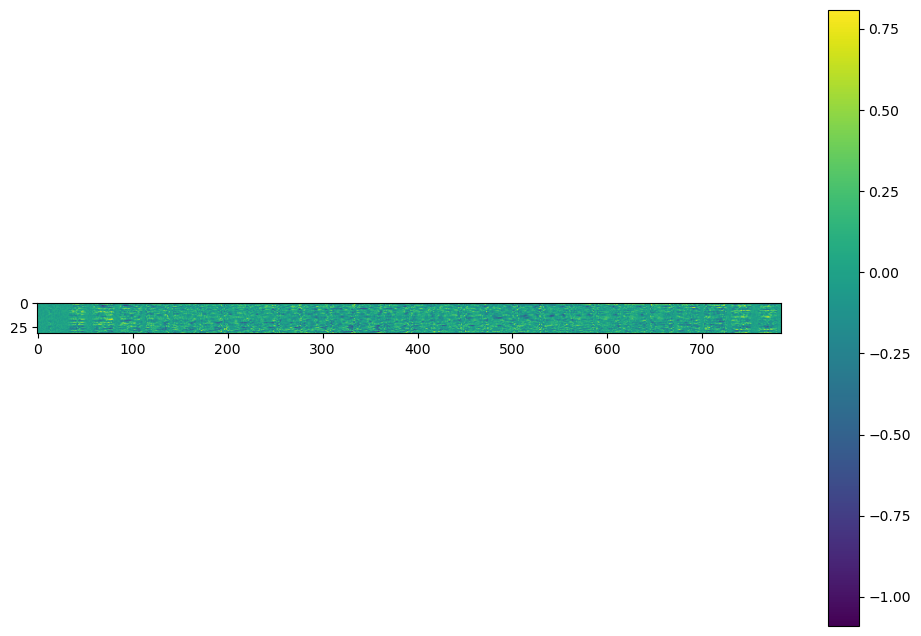

In [29]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
wts1 = model.layers[1].get_weights()[0]
plt.imshow(wts1.transpose())
plt.colorbar()

In [30]:
input_shape

(28, 28)

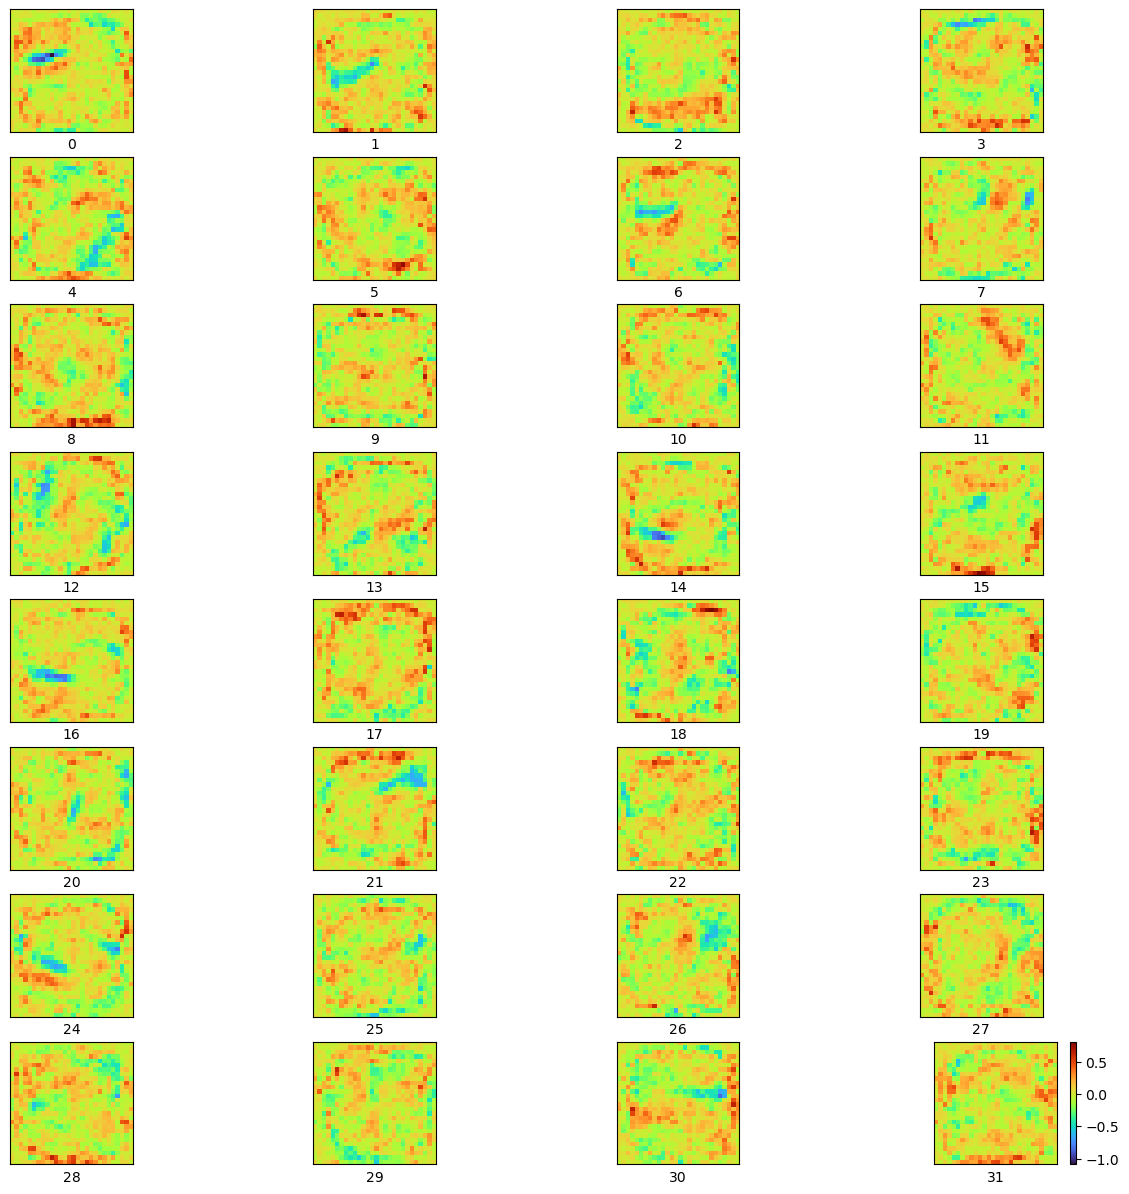

In [31]:
plt.figure(figsize=(15,15))
for i in range(32):
    plt.subplot(8,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(wts1[:,i].reshape(28,28), cmap='turbo', vmin=np.min(wts1), vmax=np.max(wts1))
    plt.xlabel(i)
plt.colorbar()

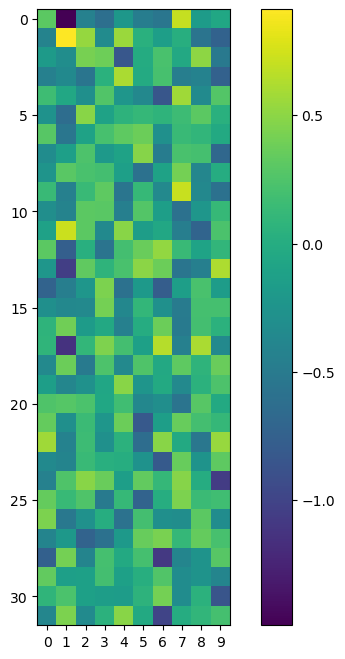

In [32]:
plt.figure(figsize=(8,8))
wts2 = model.layers[-1].get_weights()[0]
wts2.shape
plt.imshow(wts2)
plt.xticks(np.arange(10));
plt.colorbar()

In [33]:
print(model.layers[1].weights[0].shape)
print(model.layers[2].weights[0].shape)
print(model.layers[3].weights[0].shape)


(784, 32)
(32, 32)
(32, 10)


This code builds up a prototypical image for a specific label.  It only works if there are only two dense layers, so we'll build up a small model.

In [34]:
sm_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10), # 10 units correspond to 10 output classes 0-9
])
sm_model.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
sm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [35]:
train_hist = sm_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
  13/1875 [..............................] - ETA: 8s - loss: 2.1412 - accuracy: 0.2644  

2024-01-11 14:18:34.197558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 6ms/step - loss: 0.3500 - accuracy: 0.9020
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1865 - accuracy: 0.9467
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1499 - accuracy: 0.9563
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1244 - accuracy: 0.9636
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1075 - accuracy: 0.9685
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0974 - accuracy: 0.9709
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0867 - accuracy: 0.9741
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0793 - accuracy: 0.9762
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0731 - accuracy: 0.9776
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0678 - a

(32, 10)
1/1 [==============================] - 0s 34ms/step
Sure enough.  The made-up image is viewed as a '5' by the model.


2024-01-11 14:20:13.719403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<BarContainer object of 10 artists>

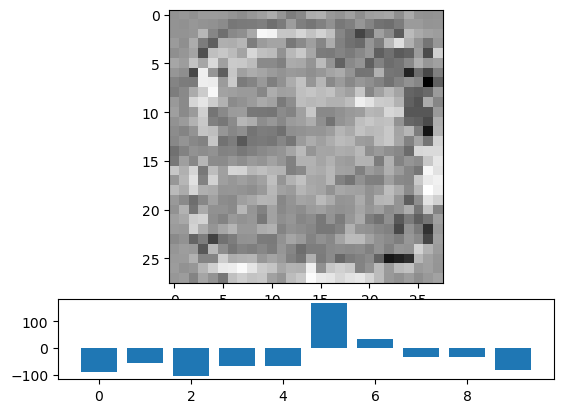

In [36]:
target = 5
wts1 = sm_model.layers[1].get_weights()[0] # 1st layer; acts on input
wts2 = sm_model.layers[2].get_weights()[0] # 2nd layer, maps 1st layer outputs to labels
print(wts2.shape)
proto = np.zeros((28,28))
for i in range(wts1.shape[1]):
    kernel_1 = wts1[:,i].reshape(28,28) # image template encoded in layer 1, neuron i's weights
    proto += kernel_1*wts2[i,target]  # weighted by how much neuron i activates the target output.

# check what value we get if we classify this made-up image.
out = sm_model.predict(proto.reshape(1,28,28))
if np.argmax(out) == target:
    print(f"Sure enough.  The made-up image is viewed as a '{target}' by the model.")
else:
    print(f"Hmmm.  This image should have been labeled as a '{target}' but was actually seen as a '{np.argmax(out)}'.")
plt.subplot(4,1,(1,3))
plt.imshow(proto, cmap='Greys')
plt.subplot(4,1,4)
plt.bar(np.arange(10), out[0])

Sometimes it is useful to view the intermediate values of a model. 
So let's build a model that gives us an intermediate output. 

In [37]:
int_model = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)
int_out = int_model.predict(train_images[0].reshape(1,28,28))

1/1 [==============================] - 0s 25ms/step


2024-01-11 14:20:13.902736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


We can also replicate the calculations using numpy to make sure we understand what is going on internally.

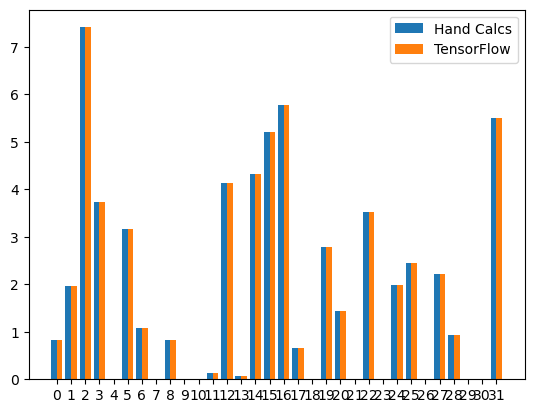

In [38]:
wts1 = model.layers[1].get_weights()[0]
bias1 = model.layers[1].get_weights()[1]
img_flat = train_images[0].flatten()
int_hand = np.maximum(0,np.matmul(wts1.transpose(), img_flat) + bias1)
grouped_bar([int_hand, int_out.squeeze()], ['Hand Calcs', 'TensorFlow'])


In [39]:
x1 = np.array([1, 3, 4, 5], dtype=float)
x2 = np.array([1, 3.1, 2.5, 5.1], dtype=float)
sns.barplot(x=['a', 'b', 'c', 'd'], y=(x1,x2))

AttributeError: 'bool' object has no attribute 'all'

In [ ]:
sns.barplot(y=[int_hand]) # , int_out.squeeze()]) # , ['Hand Calcs', 'TensorFlow'])


In [ ]:
print("Close match" if np.allclose(int_hand, int_out.squeeze()) else "Not a match")

In [ ]:
model.summary()

In [ ]:
if len(train_images.shape) == 3:  # conv net needs input tensor [batch=?,x=28,y=28,depth=1]
    train_images = np.expand_dims(train_images,3)
    test_images = np.expand_dims(test_images,3)

In [ ]:
ax1, ax2 = plotyy(train_hist.epoch, train_hist.history['accuracy'], train_hist.history['loss'], 
       xlabel='Epoch', ylabel1='Accuracy', ylabel2='Loss', color1='Blue', color2='Purple')
ax1.grid(True)